<a href="https://colab.research.google.com/github/Hariprakashhp/FINAL_PROJECT_CUSTOMER_CONVERSION_PREDICTION.ipynb/blob/main/FINAL_PROJECT_CUSTOMER_CONVERSION_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.shape

(32773, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,32773.000000,32772.000000,32772.000000,32772.000000
mean,41.057029,16.498963,254.692695,3.017027
std,9.617991,8.481927,262.868545,3.464738
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,40.000000,17.000000,173.000000,2.000000
75%,49.000000,23.000000,309.000000,3.000000
max,94.000000,31.000000,4918.000000,63.000000


In [ ]:
#MISSINGVALUES
df.isnull().sum()

age               0
job               0
marital           1
education_qual    1
call_type         1
day               1
mon               1
dur               1
num_calls         1
prev_outcome      1
y                 1
dtype: int64

In [ ]:
#FINDING DUPLICATES
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [ ]:
df["target"]=df["y"].map({"yes":1,"no":0})

In [ ]:
#replacing null values
df['job'] =df['job'].replace('unknown',np.nan)


In [ ]:
df=df.dropna(subset=['job'])


In [ ]:
df = df. dropna(subset=['education_qual'])


In [ ]:
#detecting outliers
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [ ]:
df.age = df.age.clip(10.5,70.5)

In [ ]:
#detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 622.5 Lower bound : -213.5


In [ ]:
df.dur = df.dur.clip(-219.5,640.5)

In [ ]:

#detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)


Upper bound: 6.0 Lower bound : -2.0


In [ ]:
df.num_calls = df.num_calls.clip(-2,6.0)


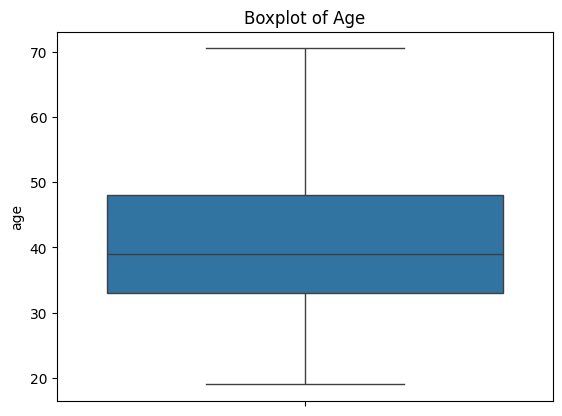

<ipython-input-161-230a3efb7e1b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


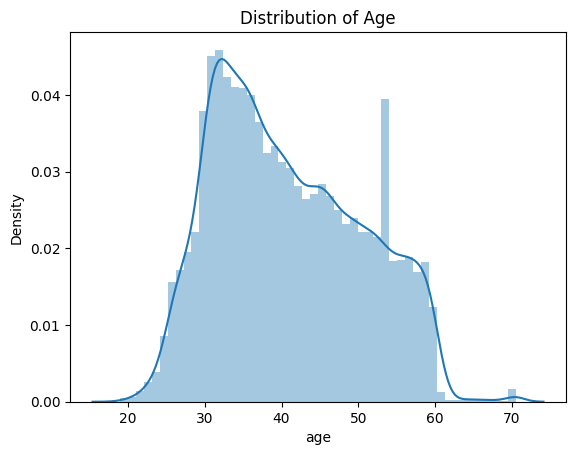

count    31337.000000
mean        40.882375
std          9.533844
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64


In [ ]:
# prompt: eda age

# EDA for age
sns.boxplot(df['age'])
plt.title('Boxplot of Age')
plt.show()

sns.distplot(df['age'])
plt.title('Distribution of Age')
plt.show()

print(df['age'].describe())


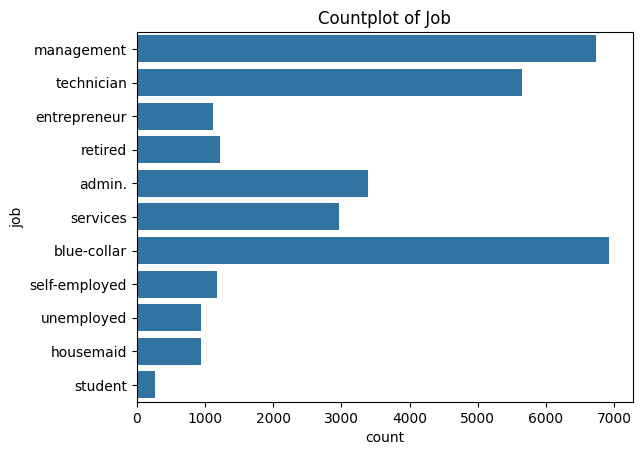

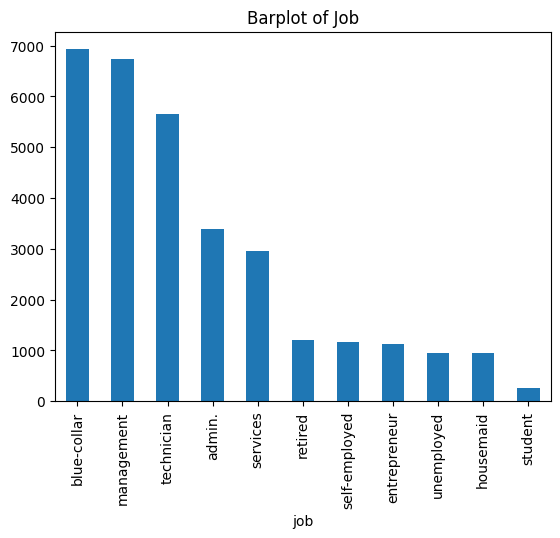

count           31337
unique             11
top       blue-collar
freq             6928
Name: job, dtype: object


In [ ]:
# prompt: eda job

# EDA for job
sns.countplot(df['job'])
plt.title('Countplot of Job')
plt.show()

df['job'].value_counts().plot(kind='bar')
plt.title('Barplot of Job')
plt.show()

print(df['job'].describe())


In [ ]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})


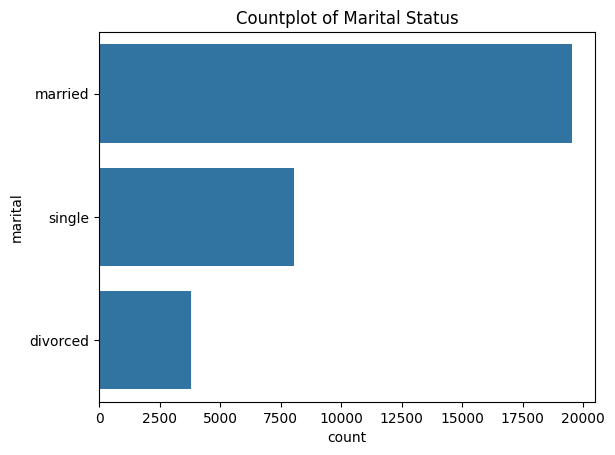

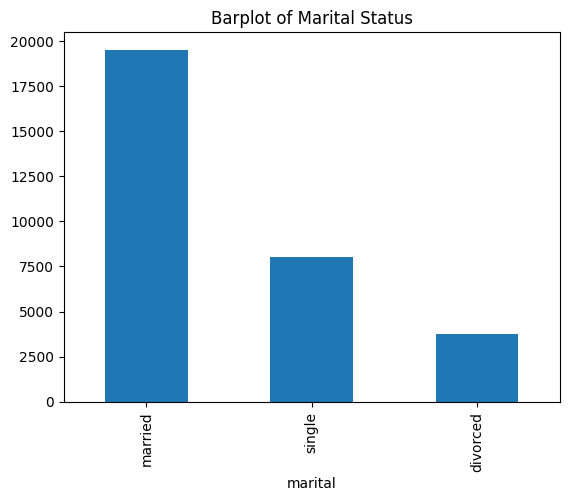

count       31337
unique          3
top       married
freq        19523
Name: marital, dtype: object


In [ ]:
# prompt: eda marital status

# EDA for marital status
sns.countplot(df['marital'])
plt.title('Countplot of Marital Status')
plt.show()

df['marital'].value_counts().plot(kind='bar')
plt.title('Barplot of Marital Status')
plt.show()

print(df['marital'].describe())


In [ ]:
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})


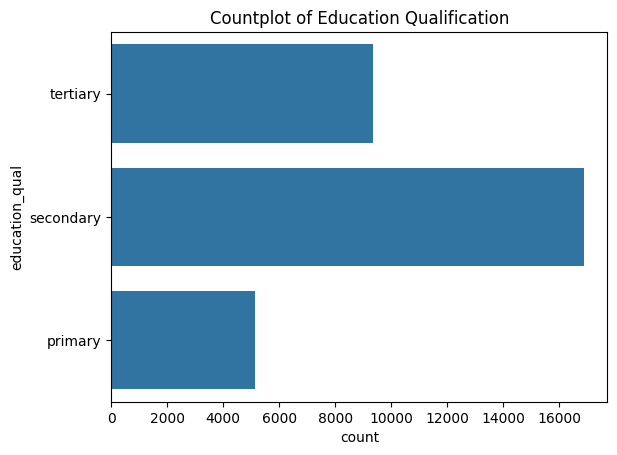

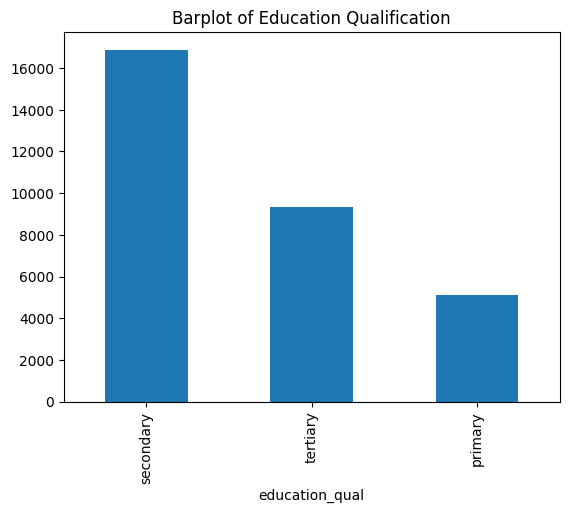

count         31337
unique            3
top       secondary
freq          16887
Name: education_qual, dtype: object


In [ ]:
# prompt: eda educational qualification

# EDA for education_qual
sns.countplot(df['education_qual'])
plt.title('Countplot of Education Qualification')
plt.show()

df['education_qual'].value_counts().plot(kind='bar')
plt.title('Barplot of Education Qualification')
plt.show()

print(df['education_qual'].describe())

df['education_qual'] =df['education_qual'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})


In [ ]:
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})


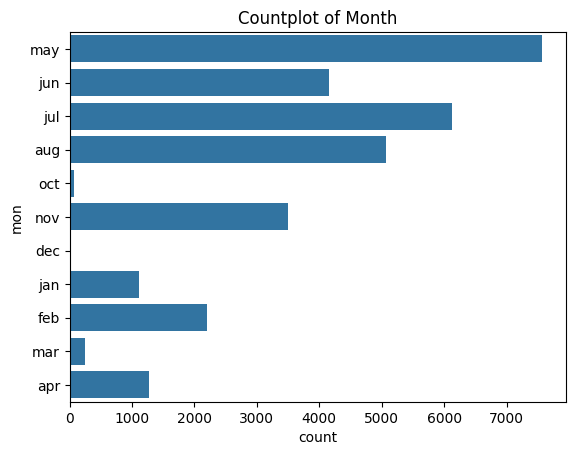

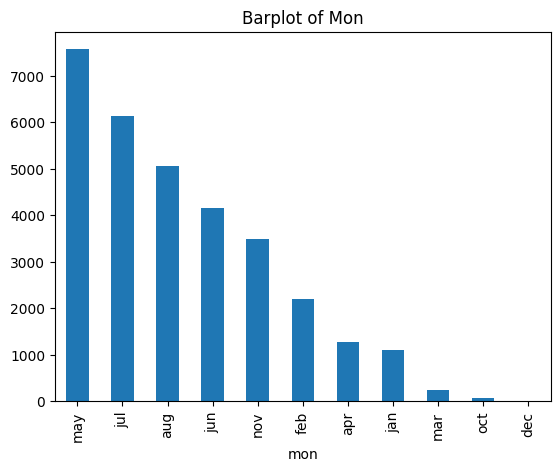

count     31337
unique       11
top         may
freq       7569
Name: mon, dtype: object


In [ ]:
# prompt: eda month

# EDA for month
sns.countplot(df['mon'])
plt.title('Countplot of Month')
plt.show()

df['mon'].value_counts().plot(kind='bar')
plt.title('Barplot of Mon')
plt.show()

print(df['mon'].describe())


In [ ]:
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})


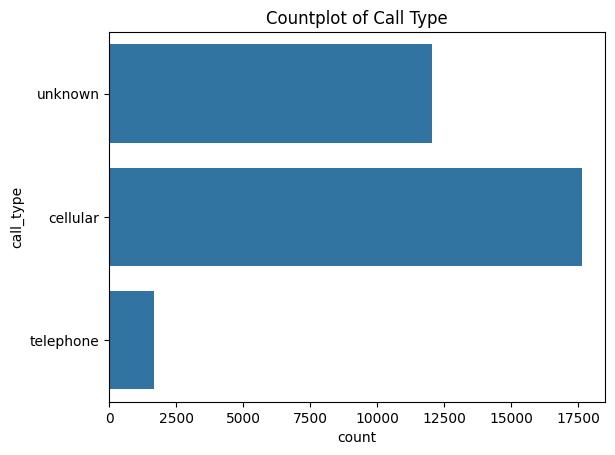

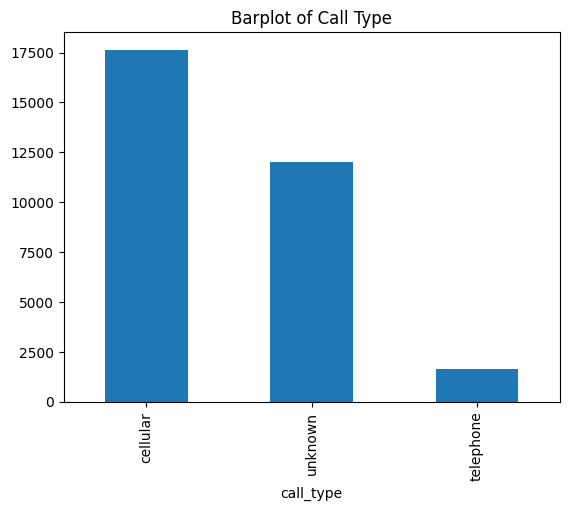

count        31337
unique           3
top       cellular
freq         17637
Name: call_type, dtype: object


In [ ]:
# prompt: eda call type

# EDA for call type
sns.countplot(df['call_type'])
plt.title('Countplot of Call Type')
plt.show()

df['call_type'].value_counts().plot(kind='bar')
plt.title('Barplot of Call Type')
plt.show()

print(df['call_type'].describe())

df['call_type'] =df['call_type'].map({'cellular': 1, 'telephone' : 2})



In [ ]:
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})


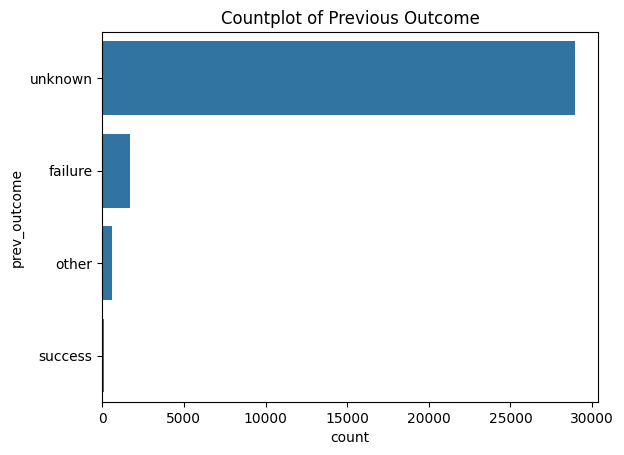

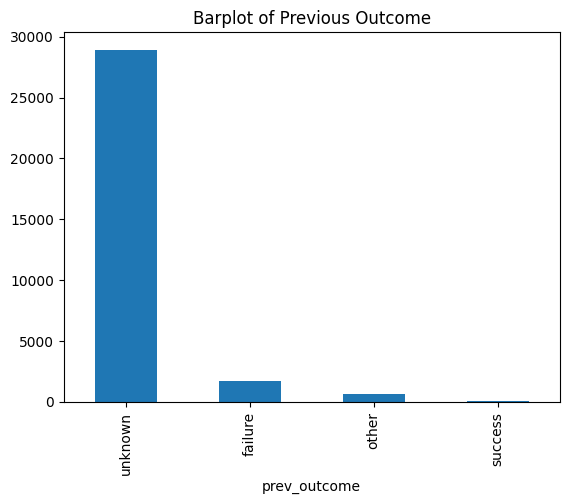

count       31337
unique          4
top       unknown
freq        28930
Name: prev_outcome, dtype: object


In [ ]:
# prompt: eda prev_outcome

# EDA for prev_outcome
sns.countplot(df['prev_outcome'])
plt.title('Countplot of Previous Outcome')
plt.show()

df['prev_outcome'].value_counts().plot(kind='bar')
plt.title('Barplot of Previous Outcome')
plt.show()

print(df['prev_outcome'].describe())

df['prev_outcome'] =df['prev_outcome'].map({'unknown': 0, 'failure' : 1, 'other' : 2, 'success' : 3})



In [ ]:
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [ ]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median', 'most_frequent', etc.
x_train_imputed = imputer.fit_transform(x_train)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy
x_train_imputed = imputer.fit_transform(x_train)

# Apply SMOTEENN to the imputed data
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train_imputed, y_train)

In [ ]:

print(len(x_train_smt))
print(len(y_train_smt))

42983
42983


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)

# Impute missing values in x_test using the same imputer fitted on x_train
x_test_imputed = imputer.transform(x_test)

x_test_scaled = scaler.transform(x_test_imputed) # Scale the imputed x_test

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)


0.8181238034460753

In [ ]:
#K NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.9298018863598146
K value : 2 Train Score :  0.9975804387781216 Cross Value Accuracy : 0.9393748312110513
K value : 3 Train Score :  0.985552427703976 Cross Value Accuracy : 0.9350691206669011
K value : 4 Train Score :  0.9862503780564409 Cross Value Accuracy : 0.9382586585546061
K value : 5 Train Score :  0.9788521043203127 Cross Value Accuracy : 0.9360242750355411
K value : 6 Train Score :  0.9792010794965451 Cross Value Accuracy : 0.9393748312110513
K value : 7 Train Score :  0.9749668473582579 Cross Value Accuracy : 0.9373012112040193
K value : 8 Train Score :  0.9756182676872251 Cross Value Accuracy : 0.9390555971689316
K value : 9 Train Score :  0.9713840355489379 Cross Value Accuracy : 0.9377791705519971
K value : 10 Train Score :  0.9722448409836447 Cross Value Accuracy : 0.9395345756199969
K value : 20 Train Score :  0.9637298466835725 Cross Value Accuracy : 0.9406510030522138
K value : 30 Train Score :  0.9577042086406253

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))



Learning rate :  0.01  Train score :  0.9667310331991718  Cross-Val score :  0.9400127897437466
Learning rate :  0.02  Train score :  0.9696856896912733  Cross-Val score :  0.9430433475498214
Learning rate :  0.03  Train score :  0.9761068329339506  Cross-Val score :  0.9433628363677128
Learning rate :  0.04  Train score :  0.9797594397785171  Cross-Val score :  0.9422458993839522
Learning rate :  0.05  Train score :  0.9829234813763581  Cross-Val score :  0.9408104926853877
Learning rate :  0.1  Train score :  0.990228695065491  Cross-Val score :  0.9412892163606807
Learning rate :  0.11  Train score :  0.9909266454179559  Cross-Val score :  0.9396933009258552
Learning rate :  0.12  Train score :  0.9912756205941884  Cross-Val score :  0.940491258643268
Learning rate :  0.13  Train score :  0.9916943908056673  Cross-Val score :  0.9401720246011485
Learning rate :  0.14  Train score :  0.9927413163343648  Cross-Val score :  0.9395338112926813
Learning rate :  0.15  Train score :  0.992

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

rf = RandomForestClassifier(max_depth=2, n_estimators=100, max_features="sqrt")
rf.fit(x_train_imputed, y_train)  # Use the imputed training data
y_pred = rf.predict(x_test_imputed)  # Use the imputed testing data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train)

for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the

In [ ]:
from xgboost import plot_importance


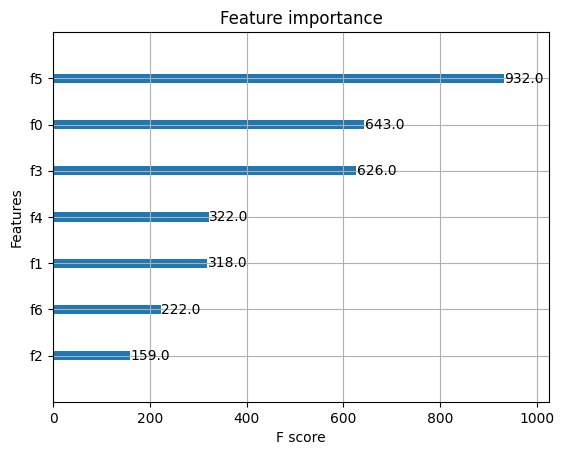

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')